<a href="https://colab.research.google.com/github/paulandrea0/REP_Temp_Clasifica_AutoEncoder/blob/main/REP_Temp_Clasifica_comp_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Set de datos Componente E** 

El set de datos corresponde a señales de sismos volcánicos del tipo VT, LP y Tor

**1.1 Lectura de datos desde Google Drive**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Set de entrenamiento y validación para seãnales sísmicas en el componente Z

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

#%reset
df_test_1 = pd.read_csv('/gdrive/MyDrive/Sismos/TVe_teste.csv')
df_train_1 = pd.read_csv('/gdrive/MyDrive/Sismos/TVe_train.csv') 
df_test_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_E_teste.csv')
df_train_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_E_train.csv')
df_test_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_E_teste.csv')
df_train_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_E_train.csv')


**1.2 Aplicando función Mean para quitar el OffSet de los datos**                                                                                                                                
Normalización a 3000 muestras por registro. 

(1474, 10993)
(256, 10993)
(362, 3000)
(40, 3000)
(61, 27408)
(6, 12282)


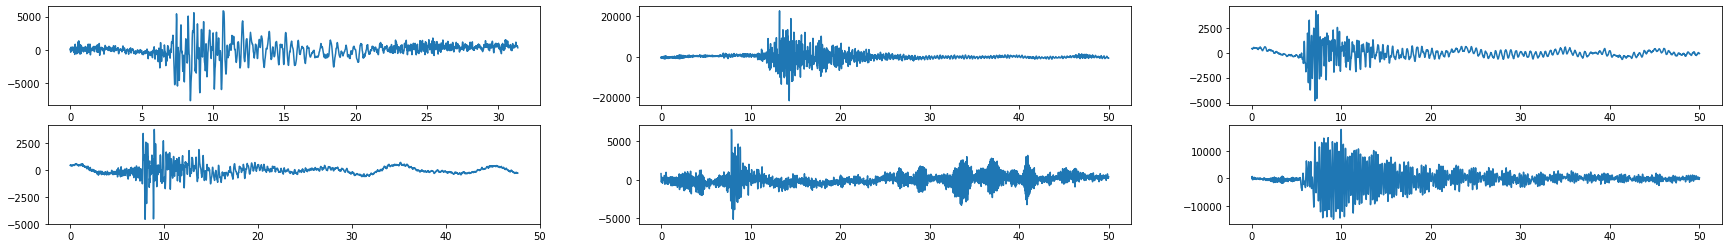

In [6]:
# Creando función para retirar el offset de los datos en DataFrame
def mean_norma(df_input):
        return df_input.apply(lambda x: (x-x.mean()), axis=1)  

df_mean_test_1 = mean_norma(df_test_1)  # Señales VT
df_mean_train_1 = mean_norma(df_train_1)
df_mean_test_2 = mean_norma(df_test_2)  # Señales LP
df_mean_train_2 = mean_norma(df_train_2)
df_mean_test_3 = mean_norma(df_test_3)  # Señales Tor
df_mean_train_3 = mean_norma(df_train_3)

print(df_mean_train_1.shape)
print(df_mean_test_1.shape)
print(df_mean_train_2.shape)
print(df_mean_test_2.shape)
print(df_mean_train_3.shape)
print(df_mean_test_3.shape)

# Convirtiendo el dataframe en array
d_train_1 = df_mean_train_1.values
d_train_1 = d_train_1[:, 0:3000]
d_test_1 = df_mean_test_1.values
d_test_1 = d_test_1[:, 0:3000]

d_train_2 = df_mean_train_2.values
d_train_2 = d_train_2[:, 0:3000]
d_test_2 = df_mean_test_2.values
d_test_2 = d_test_2[:, 0:6000]

d_train_3 = df_mean_train_3.values
d_train_3 = d_train_3[:, 0:3000]
d_test_3 = df_mean_test_3.values
d_test_3 = d_test_3[:, 0:3000]

# Dibujando la señal orioginal
n = 3000
fs = 50 # frecuencia de muestreo
t = np.linspace(0,fs,n)
plt.figure(1, figsize=(30, 4))
plt.subplot(231)
plt.plot(t, d_train_1[60])
plt.subplot(232)
plt.plot(t, d_train_2[18])
plt.subplot(233) 
plt.plot(t, d_train_3[38])
plt.subplot(234)
plt.plot(t, d_test_1[44])
plt.subplot(235)
plt.plot(t, d_test_2[34])
plt.subplot(236)
plt.plot(t, d_test_3[4])

**1.3 Eliminando valores NaN de los arreglos Numpy** 

(1474, 3000)
(256, 3000)
(362, 3000)
(40, 3000)
(61, 3000)
(6, 3000)


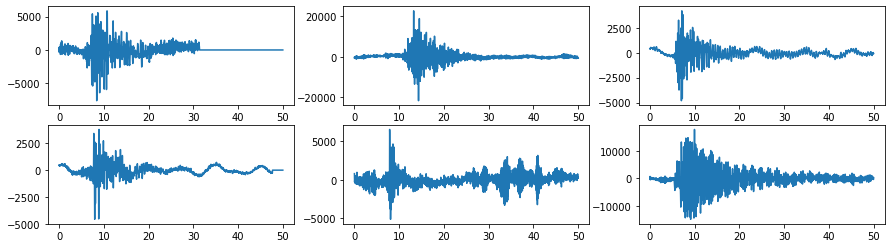

In [7]:
# Quitando los valores NaN de los array numpy

# Señales VT
d_train_1[np.isnan(d_train_1)] = 0.0
d_test_1[np.isnan(d_test_1)] = 0.0
print(d_train_1.shape)
print(d_test_1.shape)

# Señales LP
d_train_2[np.isnan(d_train_2)] = 0.0
d_test_2[np.isnan(d_test_2)] = 0.0
print(d_train_2.shape)
print(d_test_2.shape)

# Señales Tor`
d_train_3[np.isnan(d_train_3)] = 0.0
d_test_3[np.isnan(d_test_3)] = 0.0
print(d_train_3.shape)
print(d_test_3.shape)

# Graficando
plt.figure(2, figsize=(15, 4))
plt.subplot(231)
plt.plot(t, d_train_1[60])
plt.subplot(232)
plt.plot(t, d_train_2[18])
plt.subplot(233) 
plt.plot(t, d_train_3[38])
plt.subplot(234)
plt.plot(t, d_test_1[44])
plt.subplot(235)
plt.plot(t, d_test_2[34])
plt.subplot(236)
plt.plot(t, d_test_3[4])

**1.4 Normalización**

Mínimo y máximo originales: -3533709.8, 3293098.6
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -191524.2, 189104.0
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -40362.5, 38175.5
Mínimo y máximo normalizado: 0.0, 1.0


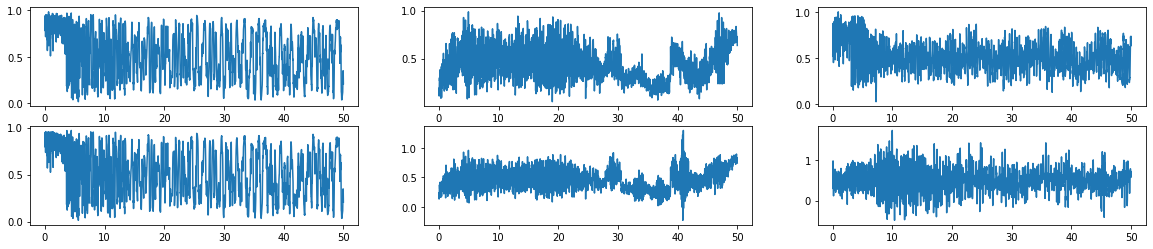

In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
D_train_s1 = min_max_scaler.fit_transform(d_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_1), np.max(d_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s1), np.max(D_train_s1))) 
D_test_s1 = min_max_scaler.transform(d_test_1)  

# Señales LP
D_train_s2 = min_max_scaler.fit_transform(d_train_2)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_2), np.max(d_train_2)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s2), np.max(D_train_s2))) 
D_test_s2 = min_max_scaler.transform(d_test_2)  

# Señales Tor
D_train_s3 = min_max_scaler.fit_transform(d_train_3)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_3), np.max(d_train_3)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s3), np.max(D_train_s3))) 
D_test_s3 = min_max_scaler.transform(d_test_3)  

# Graficando
plt.figure(3, figsize=(20, 4))
plt.subplot(231)
plt.plot(t, D_train_s1[60])
plt.subplot(232)
plt.plot(t, D_train_s2[18])
plt.subplot(233) 
plt.plot(t, D_train_s3[38])
plt.subplot(234)
plt.plot(t, D_test_s1[44])
plt.subplot(235)
plt.plot(t, D_test_s2[34])
plt.subplot(236)
plt.plot(t, D_test_s3[4])

# **2. Modelo AutoEncoder para extraer Características (Representaciones de menor dimensión)**

Importamos TensorFlow 2 que incluye Keras

In [9]:
%tensorflow_version 2.x
import tensorflow as tf
print('version de TensorFlow:' + tf.__version__)

version de TensorFlow:2.8.2


**2.1 Configuración de la arquitectura del Autoencoder**

Configuramos la arquitectura del modelo de Autoencoder. Esta configuración será reallizada teneindo en cuenta el set de entrenamiento para el conjunto de señales VT.

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping
np.random.seed(23)

dim_entrada = D_train_s1.shape[1]      
entrada = Input(shape=(dim_entrada,))
print(D_train_s1.shape[1])             

# Encoder
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.005))(entrada)
x = Dropout(0.25)(x)
x = Dense(1500, activation='relu', kernel_regularizer=l2(0.005))(x)
x = Dropout(0.25)(x)
x = Dense(800, activation='relu')(x)
x = Dropout(0.25)(x)
encoded = Dense(400, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(800, activation='relu')(encoded)
x = Dropout(0.25)(x)
x = Dense(1500, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.005))(x)
x = Dropout(0.25)(x)
decoded = Dense(3000, activation='sigmoid')(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder = Model(inputs=entrada, outputs=decoded)

autoencoder.summary()

3000
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              6002000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1500)              3001500   
                                                                 
 dropout_1 (Dropout)         (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 800)               1200800   
                                                                 
 dropout_2 (Dropout)         (None, 800)               0

**2.2 Optimización y Entrenamiento**

La pérdida corresponderá al error absoluto medio(Mean Absolute Error, MAE.                                                    
El optimizador será adam.                                              
Debido a que el set de datos (entrenamiento y validación) mayor corresponde a las señales sísmicas VT, el autoencoder es entrenado con este set de datos, teniendo en cuenta el desbalance que hay con los demás sets.

**2.2.1 Entrenando para obtener Representación para Señales VT**

Una vez entrenado el autoencoder con el set de entenamiento para cada señal, se usa el set de entrenamiento y el set de prueba para obtener las representaciones respectivas de estos dos sets y así permitir conformar nuevos nuevos sets de entrenamiento y validación a partir de las representaciones con menor dimensión.

In [11]:
autoencoder1 = Model(inputs=entrada, outputs=decoded)
autoencoder1.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1.fit(D_train_s1, D_train_s1,    
                           epochs=25,
                           batch_size=150,
                           validation_data=(D_test_s1, D_test_s1),    
                           shuffle=True)

Epoch 1/25
10/10 [==============================] - 4s 46ms/step - loss: 20.9452 - accuracy: 0.0075 - val_loss: 12.3659 - val_accuracy: 0.0000e+00
Epoch 2/25
10/10 [==============================] - 0s 17ms/step - loss: 8.2367 - accuracy: 0.0712 - val_loss: 4.2752 - val_accuracy: 0.3750
Epoch 3/25
10/10 [==============================] - 0s 16ms/step - loss: 2.6457 - accuracy: 0.3066 - val_loss: 1.2116 - val_accuracy: 0.3750
Epoch 4/25
10/10 [==============================] - 0s 16ms/step - loss: 0.7198 - accuracy: 0.3826 - val_loss: 0.3222 - val_accuracy: 0.3750
Epoch 5/25
10/10 [==============================] - 0s 17ms/step - loss: 0.2125 - accuracy: 0.3874 - val_loss: 0.1265 - val_accuracy: 0.3750
Epoch 6/25
10/10 [==============================] - 0s 16ms/step - loss: 0.0966 - accuracy: 0.4037 - val_loss: 0.0650 - val_accuracy: 0.3750
Epoch 7/25
10/10 [==============================] - 0s 16ms/step - loss: 0.0605 - accuracy: 0.4342 - val_loss: 0.0400 - val_accuracy: 0.3750
Epoch 8

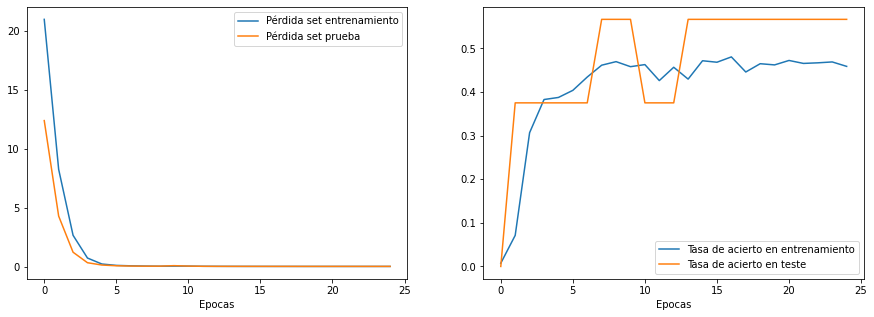

In [12]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

Una vez entrenado el modelo con el set correspondiente a las señales VT, se extrae la representación contenida en el "bottleneck" del AutoEncoder.

In [13]:
bottleneck = Model(entrada, encoded)
rep_test_1 = bottleneck.predict(D_test_s1)
rep_train_1 = bottleneck.predict(D_train_s1)
print(rep_test_1.shape)
print(rep_train_1.shape)

(256, 400)
(1474, 400)


**2.2.2 Entrenando para obtener Representación para Señales LP**

Usamos la misma arquitectura del autoencoder, sin embargo, entrenamos con señales LP

In [14]:
autoencoder2 = Model(inputs=entrada, outputs=decoded)
autoencoder2.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder2.fit(D_train_s2, D_train_s2,    
                           epochs=25,
                           batch_size=50,
                           validation_data=(D_test_s2, D_test_s2),    
                           shuffle=True)

Epoch 1/25
8/8 [==============================] - 1s 38ms/step - loss: 0.1903 - accuracy: 0.0000e+00 - val_loss: 0.1866 - val_accuracy: 0.0000e+00
Epoch 2/25
8/8 [==============================] - 0s 15ms/step - loss: 0.1715 - accuracy: 0.0028 - val_loss: 0.1619 - val_accuracy: 0.0000e+00
Epoch 3/25
8/8 [==============================] - 0s 16ms/step - loss: 0.1452 - accuracy: 0.0221 - val_loss: 0.1370 - val_accuracy: 0.5250
Epoch 4/25
8/8 [==============================] - 0s 15ms/step - loss: 0.1252 - accuracy: 0.3729 - val_loss: 0.1150 - val_accuracy: 0.5250
Epoch 5/25
8/8 [==============================] - 0s 14ms/step - loss: 0.1065 - accuracy: 0.5193 - val_loss: 0.0875 - val_accuracy: 0.5250
Epoch 6/25
8/8 [==============================] - 0s 13ms/step - loss: 0.0890 - accuracy: 0.5359 - val_loss: 0.0813 - val_accuracy: 0.5250
Epoch 7/25
8/8 [==============================] - 0s 14ms/step - loss: 0.0804 - accuracy: 0.5552 - val_loss: 0.0798 - val_accuracy: 0.5250
Epoch 8/25
8/8 

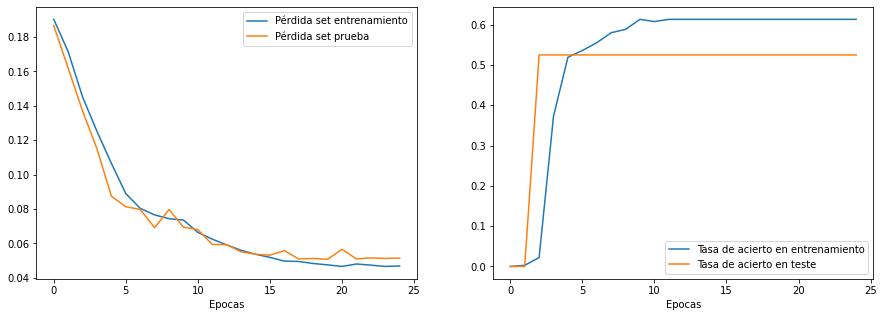

In [15]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

Una vez entrenado el modelo con el set correspondiente a las señales LP, se extrae la representación contenida en el "bottleneck" del AutoEncoder.

In [16]:
bottleneck = Model(entrada, encoded)
rep_test_2 = bottleneck.predict(D_test_s2)
print(rep_test_2.shape)
rep_train_2 = bottleneck.predict(D_train_s2)
print(rep_train_2.shape)

(40, 400)
(362, 400)


**2.2.3 Entrenando para obtener Representación para Señales Tor**

Usamos la misma arquitectura del autoencoder, sin embargo, entrenamos con señales Tor

In [17]:
autoencoder3 = Model(inputs=entrada, outputs=decoded)
autoencoder3.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder3.fit(D_train_s3, D_train_s3,    
                           epochs=25,
                           batch_size=2,
                           validation_data=(D_test_s3, D_test_s3),    
                           shuffle=True)

Epoch 1/25
31/31 [==============================] - 1s 24ms/step - loss: 0.1630 - accuracy: 0.0164 - val_loss: 0.1422 - val_accuracy: 0.0000e+00
Epoch 2/25
31/31 [==============================] - 0s 11ms/step - loss: 0.1199 - accuracy: 0.0164 - val_loss: 0.1081 - val_accuracy: 0.0000e+00
Epoch 3/25
31/31 [==============================] - 0s 11ms/step - loss: 0.1087 - accuracy: 0.0164 - val_loss: 0.1079 - val_accuracy: 0.0000e+00
Epoch 4/25
31/31 [==============================] - 0s 11ms/step - loss: 0.1027 - accuracy: 0.0328 - val_loss: 0.0995 - val_accuracy: 0.0000e+00
Epoch 5/25
31/31 [==============================] - 0s 10ms/step - loss: 0.1023 - accuracy: 0.0164 - val_loss: 0.0967 - val_accuracy: 0.0000e+00
Epoch 6/25
31/31 [==============================] - 0s 11ms/step - loss: 0.0997 - accuracy: 0.0164 - val_loss: 0.0960 - val_accuracy: 0.1667
Epoch 7/25
31/31 [==============================] - 0s 11ms/step - loss: 0.0981 - accuracy: 0.0328 - val_loss: 0.0966 - val_accuracy: 

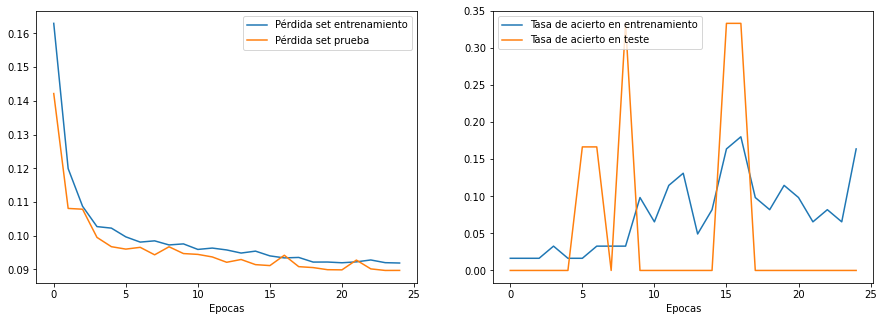

In [18]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

Una vez entrenado el modelo con el set correspondiente a las señales Tor, se extrae la representación contenida en el "bottleneck" del AutoEncoder.

In [19]:
bottleneck = Model(entrada, encoded)
rep_test_3 = bottleneck.predict(D_test_s3)
print(rep_test_3.shape)
rep_train_3 = bottleneck.predict(D_train_s3)
print(rep_train_3.shape)

(6, 400)
(61, 400)


**2.3. Representaciones de menor Dimensión**

Una vez entrenado el autoencoder extraemos la información aprendida de la capa de menor dimensión, la cual consigue representar mejor la señal.

A continuación se presenta una representación por cada tipo de señal solo para poder identificar las diferntes representaciones obtenidas.

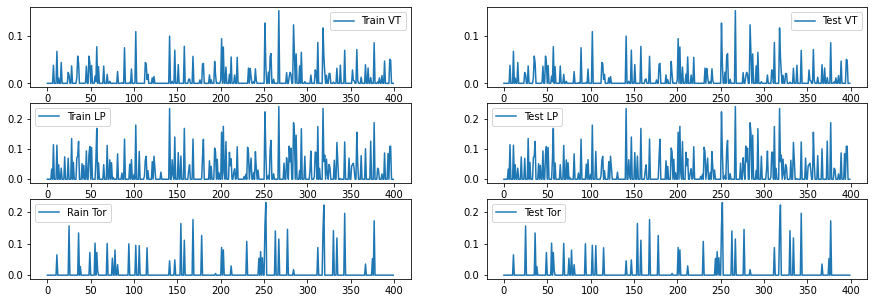

In [20]:
Representación = Model(inputs=entrada, outputs=encoded)
Representación.summary

# Observamos cómo el Autoencoder consigue representar 

dato = 5    # Elegimos un dato al azar de los registro de los data sets de validación
# El data set con el menor número de datos de validación es para la señal Tor con 6 ejemplos.

plt.figure(figsize=(15,5))
plt.subplot(3,2,1)
plt.plot(rep_train_1[dato])
plt.legend(labels=["Train VT"])
plt.subplot(3,2,2)
plt.plot(rep_test_1[dato])
plt.legend(labels=["Test VT"])
plt.subplot(3,2,3)
plt.plot(rep_train_2[dato])
plt.legend(labels=["Train LP"])
plt.subplot(3,2,4)
plt.plot(rep_test_2[dato])
plt.legend(labels=["Test LP"])
plt.subplot(3,2,5)
plt.plot(rep_train_3[dato])
plt.legend(labels=["Rain Tor"])
plt.subplot(3,2,6)
plt.plot(rep_test_3[dato])
plt.legend(labels=["Test Tor"])

# **3. Modelo de AutoEncoder para Clasificación**

Con las representaciones obtenidas con el modelo de autoencoder anterior, estas son normalizadas y presentadas a un nuevo autoencoder para su posterior clasificación bajo el enfoque de distribución del error de reconstrucción.

**3.1 Normalización de las representaciones**

Mínimo y máximo originales: 0.0, 0.2
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: 0.0, 0.2
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: 0.0, 0.2
Mínimo y máximo normalizado: 0.0, 1.0
400


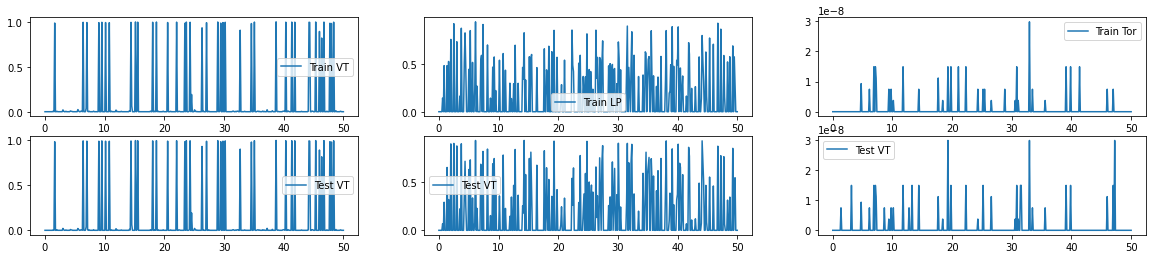

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
Rep_train_s1 = min_max_scaler.fit_transform(rep_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(rep_train_1), np.max(rep_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(Rep_train_s1), np.max(Rep_train_s1))) 
Rep_test_s1 = min_max_scaler.transform(rep_test_1)  

# Señales LP
Rep_train_s2 = min_max_scaler.fit_transform(rep_train_2)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(rep_train_2), np.max(rep_train_2)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s2), np.max(D_train_s2))) 
Rep_test_s2 = min_max_scaler.transform(rep_test_2)  

# Señales Tor
Rep_train_s3 = min_max_scaler.fit_transform(rep_train_3)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(rep_train_3), np.max(rep_train_3)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s3), np.max(D_train_s3))) 
Rep_test_s3 = min_max_scaler.transform(rep_test_3)  

# Graficando
n3 = Rep_train_s1.shape[1]
t3 = np.linspace(0,fs,n3) # creando un vector de tiempo
print(len(t3))
plt.figure(figsize=(20, 4))
plt.subplot(231)
plt.plot(t3, Rep_train_s1[60])
plt.legend(labels=["Train VT"])
plt.subplot(232)
plt.plot(t3, Rep_train_s2[18])
plt.legend(labels=["Train LP"])
plt.subplot(233) 
plt.plot(t3, Rep_train_s3[38])
plt.legend(labels=["Train Tor"])
plt.subplot(234)
plt.plot(t3, Rep_test_s1[44])
plt.legend(labels=["Test VT"])
plt.subplot(235)
plt.plot(t3, Rep_test_s2[34])
plt.legend(labels=["Test VT"])
plt.subplot(236)
plt.plot(t3, Rep_test_s3[4])
plt.legend(labels=["Test VT"])

**3.2 Modelo de AutoEncoder para posterior Clasificación**

A continuación se configura la arquitectura del AutoEncoder para que este aprenda la reconstrucción con el set de datos de entrenamiento para las señales VT que es de la cual se tiene un set con un mayor número de ejemplos.

In [22]:
np.random.seed(23)

dim_entrada = Rep_train_s1.shape[1]      
entrada = Input(shape=(dim_entrada,))
print(Rep_train_s1.shape[1])             

# Encoder
x = Dense(300, activation='relu', kernel_regularizer=l2(0.005))(entrada)
x = Dropout(0.25)(x)
x = Dense(150, activation='relu', kernel_regularizer=l2(0.005))(entrada)
x = Dropout(0.25)(x)
x = Dense(100, activation='relu', kernel_regularizer=l2(0.005))(x)
x = Dropout(0.25)(x)
encoded = Dense(50, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(100, activation='relu')(encoded)
x = Dropout(0.25)(x)
x = Dense(150, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(0.25)(x)
decoded = Dense(400, activation='sigmoid')(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder = Model(inputs=entrada, outputs=decoded)

autoencoder.summary()

400
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400)]             0         
                                                                 
 dense_8 (Dense)             (None, 150)               60150     
                                                                 
 dropout_7 (Dropout)         (None, 150)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               15100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 bottleneck_layer (Dense)    (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 100)               

**3.3 Optimización y Entrenamiento**

Lapérdida corresponderá al error absoluto medio (MAE) y el optimizador será adam.

In [23]:
autoencoder.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder.fit(Rep_train_s1, Rep_train_s1,    
                           epochs=20,
                           batch_size=150,
                           validation_data=(Rep_test_s1, Rep_test_s1),    
                           shuffle=True)

Epoch 1/20
10/10 [==============================] - 1s 23ms/step - loss: 1.9723 - accuracy: 6.7843e-04 - val_loss: 1.6370 - val_accuracy: 0.0000e+00
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 1.2729 - accuracy: 0.0000e+00 - val_loss: 1.0199 - val_accuracy: 0.0000e+00
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 0.9110 - accuracy: 6.7843e-04 - val_loss: 0.7829 - val_accuracy: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6965 - accuracy: 6.7843e-04 - val_loss: 0.5958 - val_accuracy: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5289 - accuracy: 6.7843e-04 - val_loss: 0.4514 - val_accuracy: 0.0000e+00
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4005 - accuracy: 6.7843e-04 - val_loss: 0.3416 - val_accuracy: 0.0000e+00
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 0.3031 - accuracy: 6.7843e-04 - val_los

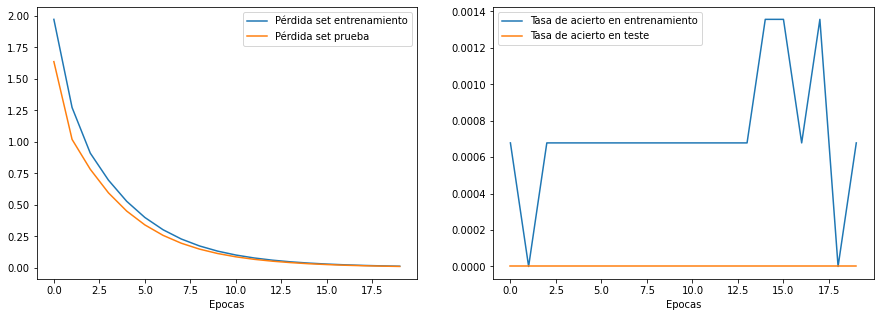

In [24]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

# **4. Clasificación**

Identificamos qué tan bien el modelo es capaz de reconstruir las señales para las cuales fue entrenado (VT) como también las otras señales de tal forma que se pueda identificar el error de reconstrucción.

**3.1 Identificación de la distribución del error**

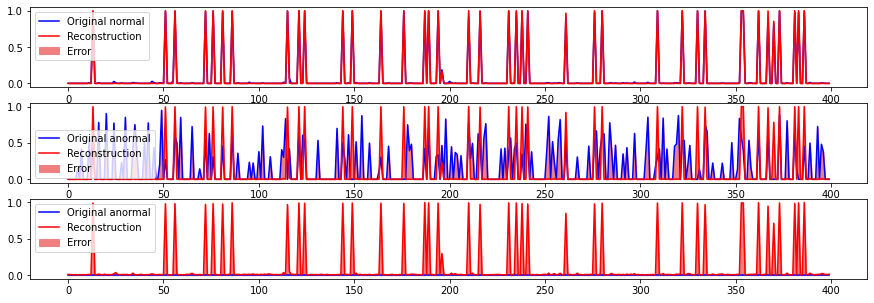

In [25]:
rec_1 = autoencoder(Rep_test_s1).numpy()
rec_2 = autoencoder(Rep_test_s2).numpy()
rec_3 = autoencoder(Rep_test_s3).numpy()

dato = 5    # Elegimos un dato al azar de los registro de los data sets de validación
# El data set con el menor número de datos de validación es para la señal Tor con 6 ejemplos.

plt.figure(figsize=(15,5))
plt.subplot(3,1,1)
plt.plot(Rep_test_s1[dato],'b')
plt.plot(rec_1[dato],'r')
plt.fill_between(np.arange(400), rec_1[dato], Rep_test_s1[dato], color='lightcoral')
plt.legend(labels=["Original normal", "Reconstruction", "Error"])
plt.subplot(3,1,2)
plt.plot(Rep_test_s2[dato],'b')
plt.plot(rec_2[dato],'r')
plt.fill_between(np.arange(400), rec_2[dato], Rep_test_s2[dato], color='lightcoral')
plt.legend(labels=["Original anormal", "Reconstruction", "Error"])
plt.subplot(3,1,3)
plt.plot(Rep_test_s3[dato],'b')
plt.plot(rec_3[dato],'r')
plt.fill_between(np.arange(400), rec_3[dato], Rep_test_s3[dato], color='lightcoral')
plt.legend(labels=["Original anormal", "Reconstruction", "Error"])

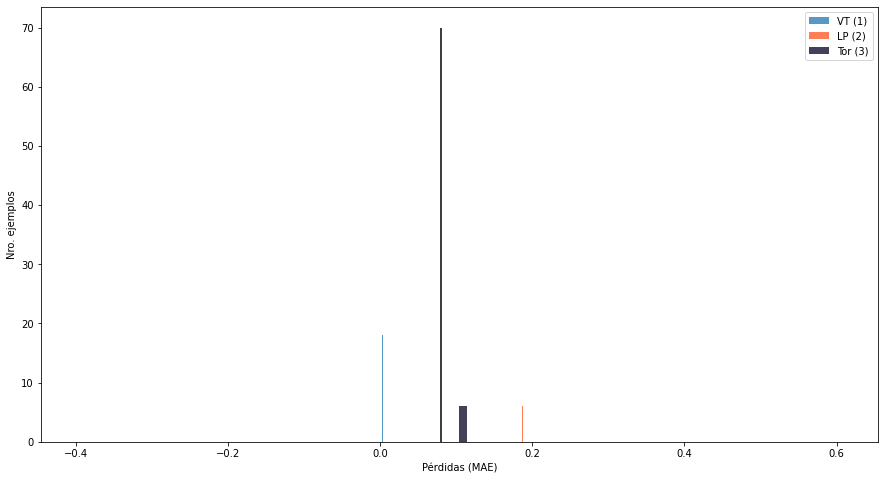

In [26]:
rec_1 = autoencoder.predict(Rep_test_s1)
rec_2 = autoencoder.predict(Rep_test_s2)
rec_3 = autoencoder.predict(Rep_test_s3)

loss_1 = tf.keras.losses.mae(rec_1, Rep_test_s1)
loss_2 = tf.keras.losses.mae(rec_2, Rep_test_s2)
loss_3 = tf.keras.losses.mae(rec_3, Rep_test_s3)

plt.figure(figsize=(15,8))
plt.hist(loss_1[None,:], bins=100, alpha=0.75, label='VT (1)')
plt.hist(loss_2[None,:], bins=100, alpha=0.75, color='#ff521b', label='LP (2)')
plt.hist(loss_3[None,:], bins=100, alpha=0.75, color='#020122', label='Tor (3)')

plt.xlabel('Pérdidas (MAE)')
plt.ylabel('Nro. ejemplos')
plt.legend(loc='upper right')
plt.vlines(0.08,0,70,'k')

**3.2 Definición del humbral de clasificación**

In [27]:
umbral = np.mean(loss_1) + np.std(loss_1)
print("Umbral: ", umbral)

Umbral:  0.0038438966


**3.3 Sensitividad y Especificidad**

*   **Verdaderos positivos (TP):** anormales que han sido correctamente clasificados como anormales
*   **Falsos negativos (FN):** anormales que han sido clasificados erróneamente como normales
*   **Verdaderos negativos (TN):** normales que han sido correctamente clasificados como normales
*   **Falsos positivos (FP):** normales que han sido clasificados erróneamente como anormales

La **sensitividad** mide la proporción de anormales que fueron detectados correctamente como anormales. Una sensitividad del 100% detectará a todos los pacientes enfermos:

$$Sensitividad = \dfrac{TP}{TP+FN}$$

La **especificidad** mide la proporción de normales que fueron detectados correctamente como normales. Una especificidad del 100% detectará a todos los pacientes sanos:
$$Especificidad = \dfrac{TN}{TN+FP}$$

In [28]:
# Definiendo funciones para la clasificación individual
def identificar(modelo, datos, umbral):
  reconstrucciones = modelo(datos)
  perdida = tf.keras.losses.mae(reconstrucciones, datos)
  return tf.math.less(perdida, umbral)

def calcular_sensitividad(identificacion, titulo):
  TP = np.count_nonzero(~identificacion)
  FN = np.count_nonzero(identificacion)
  sen = 100*(TP/(TP+FN))

  print(titulo + ': {:.1f}%'.format(sen))

def calcular_especificidad(identificacion, titulo):
  TN = np.count_nonzero(identificacion)
  FP = np.count_nonzero(~identificacion)
  esp = 100*(TN/(TN+FP))

  print(titulo + ': {:.1f}%'.format(esp))
  return esp

In [29]:
# Identificación del tipo de señal
pred_1 = identificar(autoencoder, Rep_test_s1, umbral)
pred_2 = identificar(autoencoder, Rep_test_s2, umbral)
pred_3 = identificar(autoencoder, Rep_test_s3, umbral)

# Calculo de Especificidad
esp_1 = calcular_especificidad(pred_1,'Especificidad (cat. VT, VT)')

# Cálculo de Sensitividad
sen_2 = calcular_sensitividad(pred_2,'Sensitividad (cat. LP, NO VTs)')
sen_3 = calcular_sensitividad(pred_3,'Sensitividad (cat. Tor, NO VTs)')

Especificidad (cat. VT, VT): 98.8%
Sensitividad (cat. LP, NO VTs): 100.0%
Sensitividad (cat. Tor, NO VTs): 100.0%


**3.3 Clasificador II para las señales restantes: LP y Tor**

Optimización y entrenamiento

In [30]:
autoencoder.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder.fit(Rep_train_s2, Rep_train_s2,    
                           epochs=15,
                           batch_size=30,
                           validation_data=(Rep_test_s2, Rep_test_s2),    
                           shuffle=True)

Epoch 1/15
13/13 [==============================] - 1s 17ms/step - loss: 0.1694 - accuracy: 0.0000e+00 - val_loss: 0.1160 - val_accuracy: 0.0000e+00
Epoch 2/15
13/13 [==============================] - 0s 5ms/step - loss: 0.0817 - accuracy: 0.0083 - val_loss: 0.0355 - val_accuracy: 0.0000e+00
Epoch 3/15
13/13 [==============================] - 0s 6ms/step - loss: 0.0357 - accuracy: 0.0387 - val_loss: 0.0209 - val_accuracy: 0.9000
Epoch 4/15
13/13 [==============================] - 0s 7ms/step - loss: 0.0282 - accuracy: 0.5525 - val_loss: 0.0172 - val_accuracy: 0.9000
Epoch 5/15
13/13 [==============================] - 0s 5ms/step - loss: 0.0257 - accuracy: 0.6961 - val_loss: 0.0154 - val_accuracy: 0.9000
Epoch 6/15
13/13 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.8011 - val_loss: 0.0158 - val_accuracy: 0.9000
Epoch 7/15
13/13 [==============================] - 0s 5ms/step - loss: 0.0239 - accuracy: 0.8094 - val_loss: 0.0146 - val_accuracy: 0.9000
Epoch 8

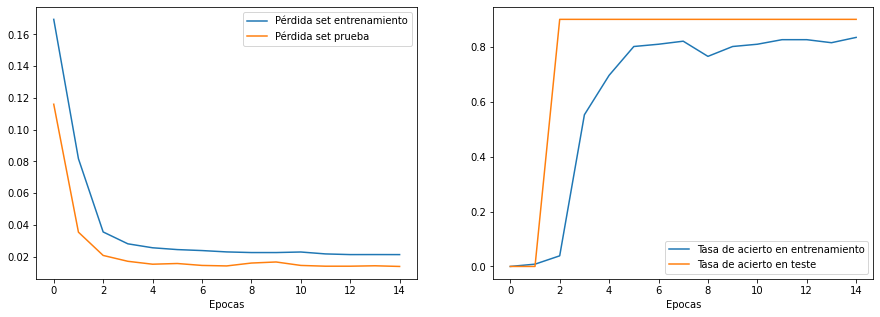

In [31]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

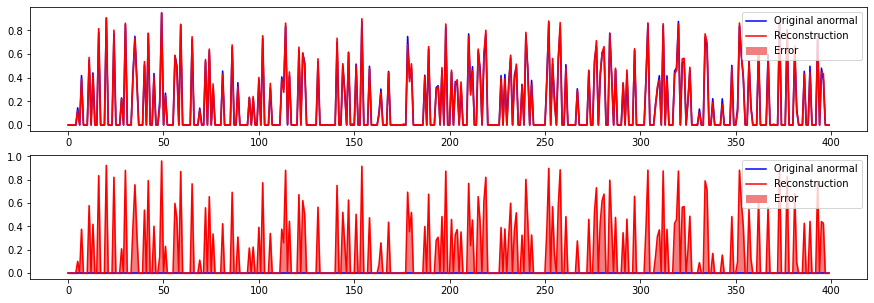

In [32]:
rec_2 = autoencoder(Rep_test_s2).numpy()
rec_3 = autoencoder(Rep_test_s3).numpy()

dato = 5    # Elegimos un dato al azar de los registro de los data sets de validación
# El data set con el menor número de datos de validación es para la señal Tor con 6 ejemplos.

plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(Rep_test_s2[dato],'b')
plt.plot(rec_2[dato],'r')
plt.fill_between(np.arange(400), rec_2[dato], Rep_test_s2[dato], color='lightcoral')
plt.legend(labels=["Original anormal", "Reconstruction", "Error"])
plt.subplot(2,1,2)
plt.plot(Rep_test_s3[dato],'b')
plt.plot(rec_3[dato],'r')
plt.fill_between(np.arange(400), rec_3[dato], Rep_test_s3[dato], color='lightcoral')
plt.legend(labels=["Original anormal", "Reconstruction", "Error"])

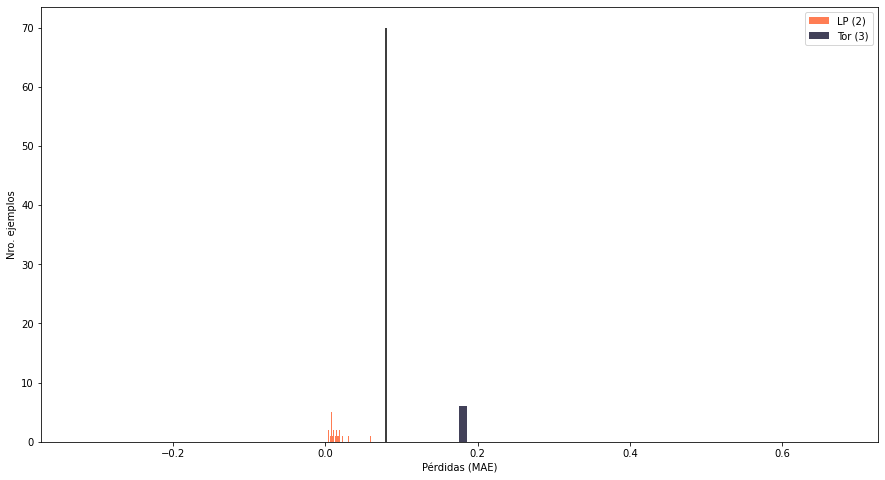

In [33]:
rec_2 = autoencoder.predict(Rep_test_s2)
rec_3 = autoencoder.predict(Rep_test_s3)

loss_2 = tf.keras.losses.mae(rec_2, Rep_test_s2)
loss_3 = tf.keras.losses.mae(rec_3, Rep_test_s3)

plt.figure(figsize=(15,8))
plt.hist(loss_2[None,:], bins=100, alpha=0.75, color='#ff521b', label='LP (2)')
plt.hist(loss_3[None,:], bins=100, alpha=0.75, color='#020122', label='Tor (3)')

plt.xlabel('Pérdidas (MAE)')
plt.ylabel('Nro. ejemplos')
plt.legend(loc='upper right')
plt.vlines(0.08,0,70,'k')

In [34]:
umbral = np.mean(loss_2) + np.std(loss_2)
print("Umbral: ", umbral)

Umbral:  0.024186544


In [35]:
# Identificación del tipo de señal
pred_2 = identificar(autoencoder, Rep_test_s2, umbral)
pred_3 = identificar(autoencoder, Rep_test_s3, umbral)

# Calculo de Especificidad
esp_2 = calcular_especificidad(pred_2,'Especificidad (cat. LP, LP)')

# Cálculo de Sensitividad
sen_3 = calcular_sensitividad(pred_3,'Sensitividad (cat. Tor, NO LPs)')

Especificidad (cat. LP, LP): 87.5%
Sensitividad (cat. Tor, NO LPs): 100.0%
